In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [5]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [6]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [8]:
df['dist_km'] =haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude', 'dropoff_longitude')

In [9]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [13]:
my_time = df['pickup_datetime'][0]

In [14]:
my_time

Timestamp('2010-04-19 08:17:56+0000', tz='UTC')

In [15]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [16]:
df['Hour'] = df['EDTdate'].dt.hour

In [19]:
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [20]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [21]:
df['Weekday']= df['EDTdate'].dt.strftime("%a")

In [22]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [24]:
cat_cols = ['Hour','AMorPM','Weekday']
cont_cols = [ 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [25]:
y_col = ['fare_amount']

In [26]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [27]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [28]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [30]:
df.Hour.head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [31]:
df.AMorPM.head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [37]:
df['AMorPM'].cat.codes.values

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [38]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [39]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [40]:
cats = np.stack([hr,ampm,wkdy],axis=1)
# cats = np.stack([[df.col].cat.codes.values for col in cat_cols],1)

In [42]:
cats = torch.tensor(cats,dtype=torch.int64)

In [43]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [45]:
conts = torch.tensor(conts,dtype=torch.float)

In [46]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [53]:
y =torch.tensor(df[y_col].values,dtype=torch.float).reshape(-1,1)

In [54]:
cats.shape

torch.Size([120000, 3])

In [55]:
conts.shape

torch.Size([120000, 6])

In [56]:
y.shape

torch.Size([120000, 1])

In [57]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [58]:
cat_szs

[24, 2, 7]

In [59]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [60]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [70]:
catz = cats[:2]

In [71]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [72]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [73]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [74]:
#forward methods
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [75]:
embeddingz

[tensor([[ 0.6282, -1.7751,  0.4086, -1.8504,  1.3247, -0.8337,  0.1102, -0.8885,
           0.8084, -0.2601,  0.0740,  1.8503],
         [ 0.6070, -0.2475,  0.4562, -0.7759, -0.6690, -0.0851, -0.4009,  0.3147,
          -1.4438,  0.8825, -1.3158, -0.5224]], grad_fn=<EmbeddingBackward>),
 tensor([[0.4077],
         [0.4077]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.0203, -1.1759, -0.1178,  1.6689],
         [-0.5621,  0.8369, -0.3483, -1.0932]], grad_fn=<EmbeddingBackward>)]

In [76]:
z = torch.cat(embeddingz,1)

In [77]:
z

tensor([[ 0.6282, -1.7751,  0.4086, -1.8504,  1.3247, -0.8337,  0.1102, -0.8885,
          0.8084, -0.2601,  0.0740,  1.8503,  0.4077, -1.0203, -1.1759, -0.1178,
          1.6689],
        [ 0.6070, -0.2475,  0.4562, -0.7759, -0.6690, -0.0851, -0.4009,  0.3147,
         -1.4438,  0.8825, -1.3158, -0.5224,  0.4077, -0.5621,  0.8369, -0.3483,
         -1.0932]], grad_fn=<CatBackward>)

In [78]:
selfembdrop = nn.Dropout(0.4)

In [79]:
z = selfembdrop(z)

In [80]:
z

tensor([[ 0.0000, -2.9585,  0.6810, -0.0000,  0.0000, -0.0000,  0.0000, -1.4808,
          0.0000, -0.4336,  0.1233,  0.0000,  0.6794, -1.7005, -0.0000, -0.0000,
          0.0000],
        [ 1.0116, -0.0000,  0.7604, -1.2932, -1.1150, -0.1418, -0.6681,  0.5245,
         -0.0000,  0.0000, -0.0000, -0.8706,  0.0000, -0.9368,  1.3948, -0.5805,
         -0.0000]], grad_fn=<MulBackward0>)

In [88]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        
        self.embeds =  nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum([nf for ni,nf in emb_szs])
        n_in = n_emb + n_cont
        
        for i in layers : 
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace = True))
            layerlist.append(nn.BatchNorm1d(i))

            layerlist.append(nn.Dropout(p))
            n_in = i
            
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self,x_cat,x_cont):
        embeddings = []
        
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
            
        x=torch.cat(embeddings,1)
        x=self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x= torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [89]:
torch.manual_seed(33)
model = TabularModel(emb_szs,conts.shape[1],1,[200,100],p=0.4)

In [90]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [91]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> rmse
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [92]:
batch_size = 60000
test_size = int(batch_size*0.2)

In [93]:
#data shuffled already
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]

In [95]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [101]:
import time

start_time = time.time()
epochs = 300
losses = []
for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train,con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss)
    
    if i % 10 == 1:
        print(f'epoch : {i} loss is {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
dur = time.time() - start_time
print(f'Training took {dur/60} min')

epoch : 1 loss is 12.500558853149414
epoch : 11 loss is 12.160984992980957
epoch : 21 loss is 11.738170623779297
epoch : 31 loss is 11.323526382446289
epoch : 41 loss is 10.903594970703125
epoch : 51 loss is 10.480284690856934
epoch : 61 loss is 10.078514099121094
epoch : 71 loss is 9.706099510192871
epoch : 81 loss is 9.366927146911621
epoch : 91 loss is 9.055989265441895
epoch : 101 loss is 8.731250762939453
epoch : 111 loss is 8.3931245803833
epoch : 121 loss is 8.016782760620117
epoch : 131 loss is 7.6094489097595215
epoch : 141 loss is 7.1871466636657715
epoch : 151 loss is 6.718172073364258
epoch : 161 loss is 6.239389896392822
epoch : 171 loss is 5.744295597076416
epoch : 181 loss is 5.25827693939209
epoch : 191 loss is 4.800881862640381
epoch : 201 loss is 4.361302852630615
epoch : 211 loss is 4.014430046081543
epoch : 221 loss is 3.7611608505249023
epoch : 231 loss is 3.619093418121338
epoch : 241 loss is 3.524198055267334
epoch : 251 loss is 3.493269205093384
epoch : 261 loss

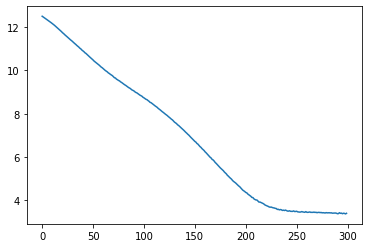

In [102]:
plt.plot(range(epochs),losses)

In [103]:
with torch.no_grad():
    y_val = model(cat_test,con_test)
    loss = torch.sqrt(criterion(y_val,y_test))

In [104]:
loss

tensor(3.3224)

In [106]:
for i in range(10):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i}.) predicted : {y_val[i].item():8.2f} True : {y_test[i].item():8.2f} Diff :{diff:8.2f}')

0.) predicted :     3.67 True :     2.90 Diff :    0.77
1.) predicted :    25.67 True :     5.70 Diff :   19.97
2.) predicted :     6.29 True :     7.70 Diff :    1.41
3.) predicted :    13.34 True :    12.50 Diff :    0.84
4.) predicted :     4.72 True :     4.10 Diff :    0.62
5.) predicted :     5.46 True :     5.30 Diff :    0.16
6.) predicted :     4.25 True :     3.70 Diff :    0.55
7.) predicted :    17.55 True :    14.50 Diff :    3.05
8.) predicted :     7.20 True :     5.70 Diff :    1.50
9.) predicted :    11.45 True :    10.10 Diff :    1.35


In [107]:
torch.save(model.state_dict(),'TaxiModel.pt')